## Flight Price Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Master/DS/

/content/drive/MyDrive/Master/DS


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()

## Importing Dataset


In [ ]:
file_list = [
    'refined_dataset.csv'
    # 'flights_02_12_2023.csv',
    # 'flights_03_12_2023.csv',
    # 'flights_04_12_2023.csv',
    # 'flights_05_12_2023.csv',
    # 'flights_06_12_2023.csv',
    # 'flights_07_12_2023.csv',
    # 'flights_08_12_2023.csv',
    # 'flights_09_12_2023.csv',
    # 'flights_10_12_2023_2.csv',
    # 'flights_10_12_2023.csv',
    # 'flights_11_12_2023.csv',
    # 'flights_11_12_2023_2.csv',
    # 'flights_12_12_2023.csv',
    # 'flights_13_12_2023.csv',
    # 'flights_14_12_2023.csv',
    # 'flights_15_12_2023_1.csv',
    # 'flights_15_12_2023_2.csv',
    # 'flights_16_12_2023.csv',
    # 'flights_17_12_2023.csv',
    # 'flights_18_12_2023.csv',
    # 'flights_19_12_2023.csv',
    # 'flights_20_12_2023.csv',
    # 'flights_21_12_2023.csv',
    # 'flights_22_12_2023.csv',
    # 'flights_23_12_2023.csv',
    # 'flights_24_12_2023.csv',
    # 'flights_25_12_2023.csv',
    # 'flights_26_12_2023.csv',
    # 'flights_27_12_2023.csv',
    # 'flights_28_12_2023.csv',
    # 'flights_29_12_2023.csv',
]

data_frames = pd.DataFrame()

# Read each CSV file and append its DataFrame to the list
for file in file_list:
    file_path = 'https://raw.githubusercontent.com/AlexandraPavel/PriceFlightEstimator/master/'+file
    df = pd.read_csv(file_path, skipinitialspace=True)
    data_frames = pd.concat([data_frames, df], ignore_index=True)





In [ ]:
train_data = data_frames.iloc[:, 1:]

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
train_data.head()

,date_of_enquiry,departure,destination,flight_date,flight_time,arrival_time,airline,layovers,flight_duration,price
0,02/12/2023,Bucuresti,Istanbul,20/12/2023,11:35,14:00,AF,0,85,106
1,02/12/2023,Bucuresti,Istanbul,20/12/2023,10:15,12:45,PC,0,90,212
2,02/12/2023,Bucuresti,Istanbul,20/12/2023,15:25,17:55,RO,0,90,325
3,02/12/2023,Bucuresti,Istanbul,21/12/2023,17:25,19:50,AF,0,85,106
4,02/12/2023,Bucuresti,Istanbul,21/12/2023,15:50,18:40,PC,0,110,182


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71449 entries, 0 to 71448
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_of_enquiry  71449 non-null  object
 1   departure        71449 non-null  object
 2   destination      71449 non-null  object
 3   flight_date      71449 non-null  object
 4   flight_time      71449 non-null  object
 5   arrival_time     71449 non-null  object
 6   airline          71449 non-null  object
 7   layovers         71449 non-null  int64 
 8   flight_duration  71449 non-null  int64 
 9   price            71449 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 5.5+ MB


In [ ]:
train_data["flight_duration"].value_counts()

185     854
140     782
120     704
200     591
95      577
       ... 
2350      1
2145      1
2110      1
2995      1
2225      1
Name: flight_duration, Length: 461, dtype: int64

In [ ]:
train_data["flight_duration"].head()

0     85
1     90
2     90
3     85
4    110
Name: flight_duration, dtype: int64

In [ ]:
train_data.shape

(71449, 10)

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71449 entries, 0 to 71448
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_of_enquiry  71449 non-null  object
 1   departure        71449 non-null  object
 2   destination      71449 non-null  object
 3   flight_date      71449 non-null  object
 4   flight_time      71449 non-null  object
 5   arrival_time     71449 non-null  object
 6   airline          71449 non-null  object
 7   layovers         71449 non-null  int64 
 8   flight_duration  71449 non-null  int64 
 9   price            71449 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 5.5+ MB


In [ ]:
train_data.isnull().sum()

date_of_enquiry    0
departure          0
destination        0
flight_date        0
flight_time        0
arrival_time       0
airline            0
layovers           0
flight_duration    0
price              0
dtype: int64

## Exploratory Data Analysis

In [ ]:
train_data["Flight_day"] =pd.to_datetime(train_data["flight_date"],format="%d/%m/%Y").dt.day
train_data["Flight_month"] =pd.to_datetime(train_data["flight_date"],format="%d/%m/%Y").dt.month
train_data["Flight_year"] =pd.to_datetime(train_data["flight_date"],format="%d/%m/%Y").dt.year
# 2023-12-30

In [ ]:
train_data["Enquiry_day"] =pd.to_datetime(train_data["date_of_enquiry"],format="%d/%m/%Y").dt.day
train_data["Enquiry_month"] =pd.to_datetime(train_data["date_of_enquiry"],format="%d/%m/%Y").dt.month

enquiry_days_before = []
enquiry_day = list(train_data["Enquiry_day"])
enquiry_month = list(train_data["Enquiry_month"])
flight_day = list(train_data["Flight_day"])
flight_month = list(train_data["Flight_month"])

for i in range(len(enquiry_day)):
    no_days = 0
    if enquiry_month[i] == flight_month[i]:
        no_days = flight_day[i] - enquiry_day[i]
    else:
        no_days = 31 - enquiry_day[i] + flight_day[i]

    enquiry_days_before.append(no_days)

train_data["Enquiry_days_before"] = enquiry_days_before

In [ ]:
train_data.sample(5)

,date_of_enquiry,departure,destination,flight_date,flight_time,arrival_time,airline,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_day,Enquiry_month,Enquiry_days_before
41074,17/12/2023,Madrid,Iasi,30/12/2023,15:10,01:20,W,2,1990,107,30,12,2023,17,12,13
770,02/12/2023,Bucuresti,Amsterdam,27/12/2023,05:35,12:40,RO,1,485,125,27,12,2023,2,12,25
66128,26/12/2023,Manchester,Bucuresti,29/12/2023,17:15,02:00,AF,1,405,210,29,12,2023,26,12,3
7170,04/12/2023,Iasi,Milano,22/12/2023,10:30,11:55,AF,0,145,36,22,12,2023,4,12,18
54457,21/12/2023,Roma,Bucuresti,02/01/2024,06:30,16:15,AF,1,525,49,2,1,2024,21,12,12


In [ ]:
train_data.drop(["flight_date"], axis = 1, inplace = True)
train_data.drop(["date_of_enquiry"], axis = 1, inplace = True)
train_data.drop(["Enquiry_day"], axis = 1, inplace = True)
train_data.drop(["Enquiry_month"], axis = 1, inplace = True)

In [ ]:
#Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["flight_time"],format="%H:%M").dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["flight_time"],format="%H:%M").dt.minute

train_data.drop(["flight_time"], axis = 1, inplace = True)

In [ ]:
train_data.head()

,departure,destination,arrival_time,airline,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min
0,Bucuresti,Istanbul,14:00,AF,0,85,106,20,12,2023,18,11,35
1,Bucuresti,Istanbul,12:45,PC,0,90,212,20,12,2023,18,10,15
2,Bucuresti,Istanbul,17:55,RO,0,90,325,20,12,2023,18,15,25
3,Bucuresti,Istanbul,19:50,AF,0,85,106,21,12,2023,19,17,25
4,Bucuresti,Istanbul,18:40,PC,0,110,182,21,12,2023,19,15,50


In [ ]:
#Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data["arrival_time"],format="%H:%M").dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data["arrival_time"],format="%H:%M").dt.minute

train_data.drop(["arrival_time"], axis = 1, inplace = True)

In [ ]:
train_data.head()

,departure,destination,airline,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Bucuresti,Istanbul,AF,0,85,106,20,12,2023,18,11,35,14,0
1,Bucuresti,Istanbul,PC,0,90,212,20,12,2023,18,10,15,12,45
2,Bucuresti,Istanbul,RO,0,90,325,20,12,2023,18,15,25,17,55
3,Bucuresti,Istanbul,AF,0,85,106,21,12,2023,19,17,25,19,50
4,Bucuresti,Istanbul,PC,0,110,182,21,12,2023,19,15,50,18,40


# Handling Categorical Data

In [ ]:
train_data["airline"].value_counts()

AF    24112
W     13505
FR     7615
LH     4528
RO     4150
U      2221
TK     1844
LO     1793
H      1662
OS     1539
VY     1397
A      1065
KL      824
LX      775
JU      738
PC      426
AZ      383
UX      361
DY      290
EN      258
EI      255
SK      242
RK      217
XZ      207
IB      173
TP      135
EW      107
D        92
I        76
TO       65
LS       58
HV       54
RP       45
BT       42
BA       37
BZ       34
FH       19
XQ       19
V        17
GQ       15
SN       11
FB       10
WF        8
F         8
KM        5
OA        4
ET        2
L         2
GF        1
CY        1
ZB        1
XC        1
Name: airline, dtype: int64

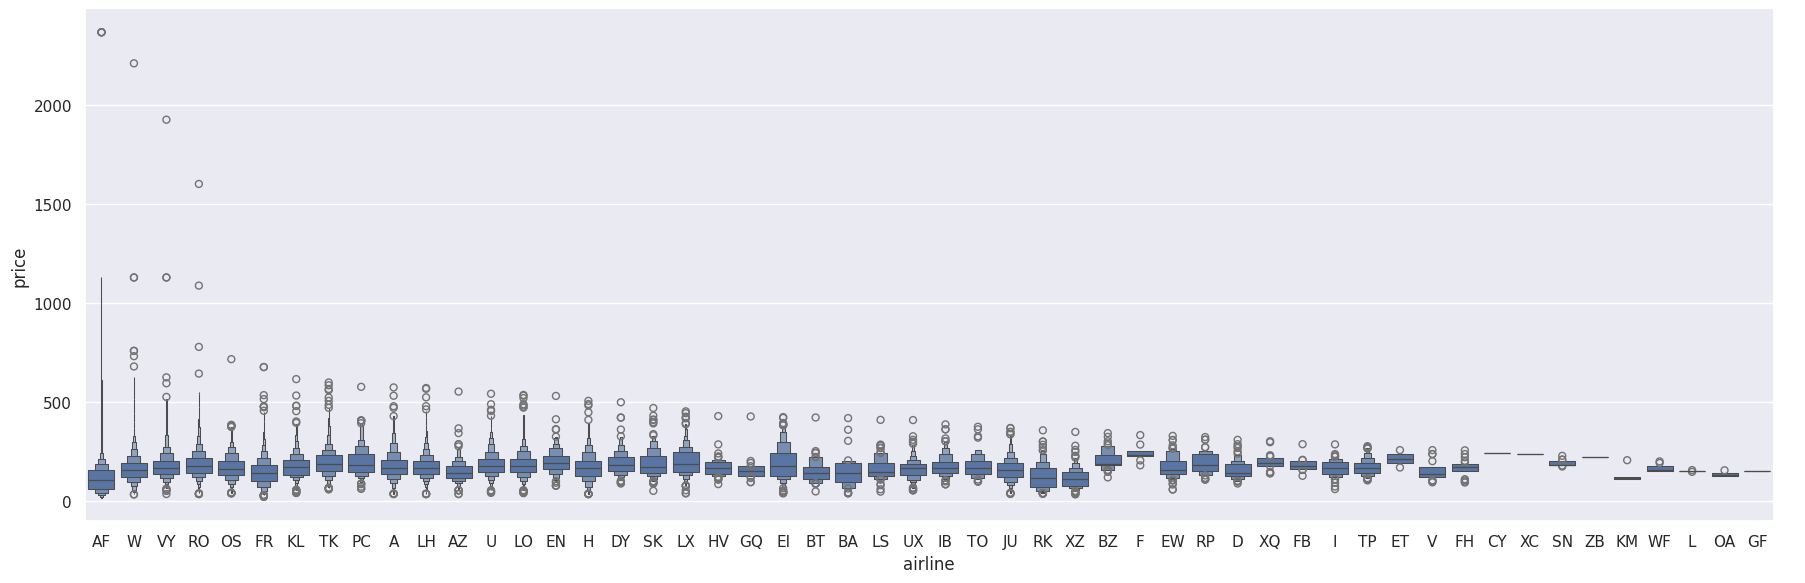

In [ ]:
# Airline vs price
sns.catplot(y= "price", x = "airline", data = train_data.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:

Airline = train_data[["airline"]]
Airline = pd.get_dummies(Airline, drop_first =True)

Airline.head()

,airline_AF,airline_AZ,airline_BA,airline_BT,airline_BZ,airline_CY,airline_D,airline_DY,airline_EI,airline_EN,airline_ET,airline_EW,airline_F,airline_FB,airline_FH,airline_FR,airline_GF,airline_GQ,airline_H,airline_HV,airline_I,airline_IB,airline_JU,airline_KL,airline_KM,airline_L,airline_LH,airline_LO,airline_LS,airline_LX,airline_OA,airline_OS,airline_PC,airline_RK,airline_RO,airline_RP,airline_SK,airline_SN,airline_TK,airline_TO,airline_TP,airline_U,airline_UX,airline_V,airline_VY,airline_W,airline_WF,airline_XC,airline_XQ,airline_XZ,airline_ZB
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data["departure"].value_counts()

Bucuresti     11876
Cluj          10980
Iasi           9718
Oslo           1944
Zurich         1944
Atena          1944
Manchester     1944
Viena          1944
Dublin         1944
Lisabona       1944
Roma           1944
Munich         1944
Barcelona      1944
Frankfurt      1944
Madrid         1944
Amsterdam      1944
Paris          1944
Londra         1944
Istanbul       1944
Bruxelles      1944
Milano         1943
Berlin         1943
Copenhaga      1941
Name: departure, dtype: int64

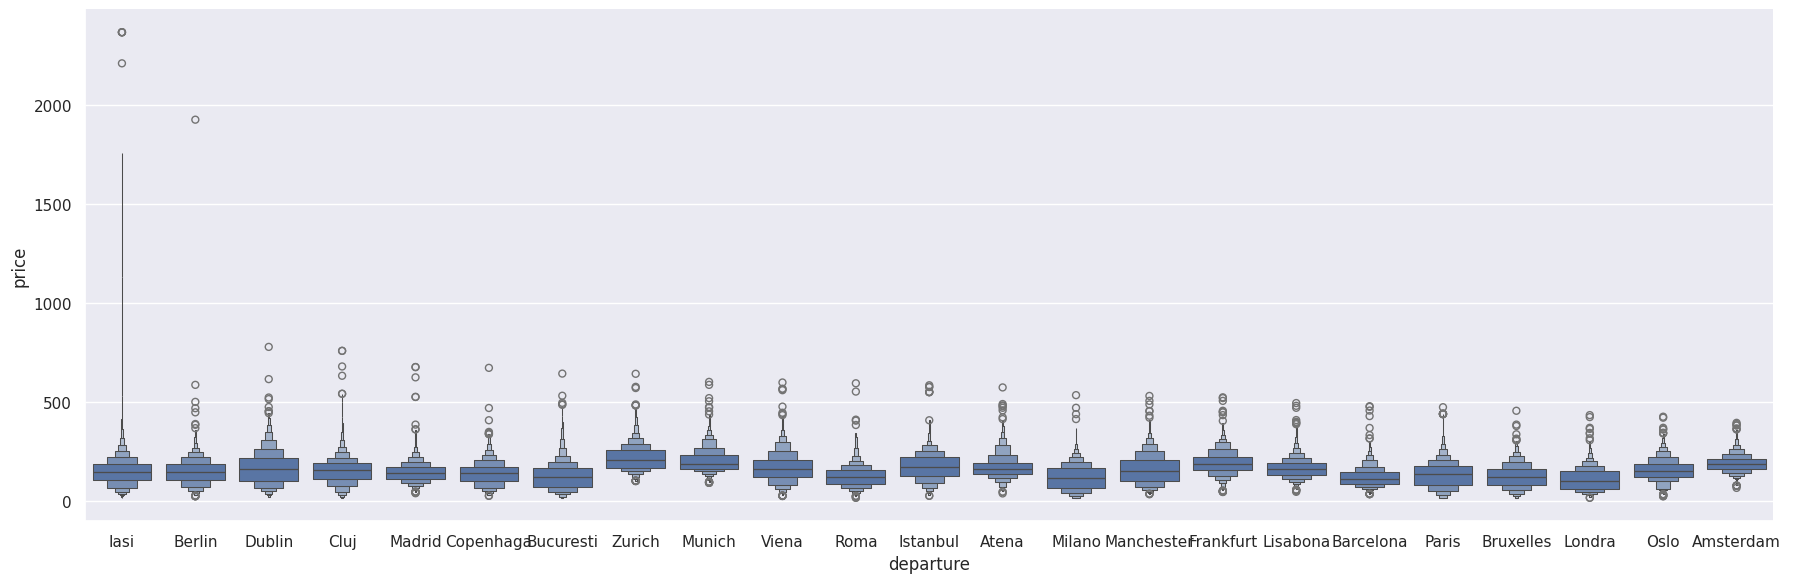

In [ ]:
sns.catplot(y = "price", x= "departure", data = train_data.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)

In [ ]:
Source =train_data[["departure"]]

Source =pd.get_dummies(Source, drop_first=True)

Source.head()

,departure_Atena,departure_Barcelona,departure_Berlin,departure_Bruxelles,departure_Bucuresti,departure_Cluj,departure_Copenhaga,departure_Dublin,departure_Frankfurt,departure_Iasi,departure_Istanbul,departure_Lisabona,departure_Londra,departure_Madrid,departure_Manchester,departure_Milano,departure_Munich,departure_Oslo,departure_Paris,departure_Roma,departure_Viena,departure_Zurich
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data["destination"].value_counts()

Bucuresti     13980
Cluj          13079
Iasi          11816
Londra         1629
Bruxelles      1629
Berlin         1629
Milano         1629
Zurich         1629
Atena          1629
Manchester     1629
Istanbul       1629
Dublin         1629
Lisabona       1629
Roma           1629
Munich         1629
Barcelona      1629
Frankfurt      1629
Madrid         1629
Amsterdam      1629
Paris          1629
Viena          1628
Oslo           1627
Copenhaga      1626
Name: destination, dtype: int64

In [ ]:
Destination =train_data[["destination"]]

Destination =pd.get_dummies(Destination, drop_first=True)

Destination.head()

,destination_Atena,destination_Barcelona,destination_Berlin,destination_Bruxelles,destination_Bucuresti,destination_Cluj,destination_Copenhaga,destination_Dublin,destination_Frankfurt,destination_Iasi,destination_Istanbul,destination_Lisabona,destination_Londra,destination_Madrid,destination_Manchester,destination_Milano,destination_Munich,destination_Oslo,destination_Paris,destination_Roma,destination_Viena,destination_Zurich
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data["layovers"].value_counts()

1    51927
0    13030
2     6477
3       15
Name: layovers, dtype: int64

In [ ]:
train_data.head()

,departure,destination,airline,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Bucuresti,Istanbul,AF,0,85,106,20,12,2023,18,11,35,14,0
1,Bucuresti,Istanbul,PC,0,90,212,20,12,2023,18,10,15,12,45
2,Bucuresti,Istanbul,RO,0,90,325,20,12,2023,18,15,25,17,55
3,Bucuresti,Istanbul,AF,0,85,106,21,12,2023,19,17,25,19,50
4,Bucuresti,Istanbul,PC,0,110,182,21,12,2023,19,15,50,18,40


In [ ]:
data_train =pd.concat([train_data,Airline,Source,Destination], axis=1)

In [ ]:
data_train.head()

,departure,destination,airline,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min,Arrival_hour,Arrival_min,airline_AF,airline_AZ,airline_BA,airline_BT,airline_BZ,airline_CY,airline_D,airline_DY,airline_EI,airline_EN,airline_ET,airline_EW,airline_F,airline_FB,airline_FH,airline_FR,airline_GF,airline_GQ,airline_H,airline_HV,airline_I,airline_IB,airline_JU,airline_KL,airline_KM,airline_L,airline_LH,airline_LO,airline_LS,airline_LX,airline_OA,airline_OS,airline_PC,airline_RK,airline_RO,airline_RP,airline_SK,airline_SN,airline_TK,airline_TO,airline_TP,airline_U,airline_UX,airline_V,airline_VY,airline_W,airline_WF,airline_XC,airline_XQ,airline_XZ,airline_ZB,departure_Atena,departure_Barcelona,departure_Berlin,departure_Bruxelles,departure_Bucuresti,departure_Cluj,departure_Copenhaga,departure_Dublin,departure_Frankfurt,departure_Iasi,departure_Istanbul,departure_Lisabona,departure_Londra,departure_Madrid,departure_Manchester,departure_Milano,departure_Munich,departure_Oslo,departure_Paris,departure_Roma,departure_Viena,departure_Zurich,destination_Atena,destination_Barcelona,destination_Berlin,destination_Bruxelles,destination_Bucuresti,destination_Cluj,destination_Copenhaga,destination_Dublin,destination_Frankfurt,destination_Iasi,destination_Istanbul,destination_Lisabona,destination_Londra,destination_Madrid,destination_Manchester,destination_Milano,destination_Munich,destination_Oslo,destination_Paris,destination_Roma,destination_Viena,destination_Zurich
0,Bucuresti,Istanbul,AF,0,85,106,20,12,2023,18,11,35,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Bucuresti,Istanbul,PC,0,90,212,20,12,2023,18,10,15,12,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Bucuresti,Istanbul,RO,0,90,325,20,12,2023,18,15,25,17,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Bucuresti,Istanbul,AF,0,85,106,21,12,2023,19,17,25,19,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Bucuresti,Istanbul,PC,0,110,182,21,12,2023,19,15,50,18,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train.drop(["airline","departure", "destination"], axis=1, inplace=True)

In [ ]:
data_train.head()

,layovers,flight_duration,price,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min,Arrival_hour,Arrival_min,airline_AF,airline_AZ,airline_BA,airline_BT,airline_BZ,airline_CY,airline_D,airline_DY,airline_EI,airline_EN,airline_ET,airline_EW,airline_F,airline_FB,airline_FH,airline_FR,airline_GF,airline_GQ,airline_H,airline_HV,airline_I,airline_IB,airline_JU,airline_KL,airline_KM,airline_L,airline_LH,airline_LO,airline_LS,airline_LX,airline_OA,airline_OS,airline_PC,airline_RK,airline_RO,airline_RP,airline_SK,airline_SN,airline_TK,airline_TO,airline_TP,airline_U,airline_UX,airline_V,airline_VY,airline_W,airline_WF,airline_XC,airline_XQ,airline_XZ,airline_ZB,departure_Atena,departure_Barcelona,departure_Berlin,departure_Bruxelles,departure_Bucuresti,departure_Cluj,departure_Copenhaga,departure_Dublin,departure_Frankfurt,departure_Iasi,departure_Istanbul,departure_Lisabona,departure_Londra,departure_Madrid,departure_Manchester,departure_Milano,departure_Munich,departure_Oslo,departure_Paris,departure_Roma,departure_Viena,departure_Zurich,destination_Atena,destination_Barcelona,destination_Berlin,destination_Bruxelles,destination_Bucuresti,destination_Cluj,destination_Copenhaga,destination_Dublin,destination_Frankfurt,destination_Iasi,destination_Istanbul,destination_Lisabona,destination_Londra,destination_Madrid,destination_Manchester,destination_Milano,destination_Munich,destination_Oslo,destination_Paris,destination_Roma,destination_Viena,destination_Zurich
0,0,85,106,20,12,2023,18,11,35,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,90,212,20,12,2023,18,10,15,12,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,90,325,20,12,2023,18,15,25,17,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,85,106,21,12,2023,19,17,25,19,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,110,182,21,12,2023,19,15,50,18,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train.shape

(71449, 106)

# Test Set

In [ ]:
X = data_train.loc[:, data_train.columns]
X.drop(["price"], axis = 1, inplace = True)
y = data_train['price']

print("X dataset", X)
print("y dataset", y)

X_train, X_test_2, y_train, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state=1234)
test_data = pd.concat([pd.DataFrame(X_test_2), pd.DataFrame(pd.DataFrame(y_test_2), columns=['price'])], axis=1)
X, y = X_train, y_train

X dataset        layovers  flight_duration  Flight_day  Flight_month  Flight_year  \
0             0               85          20            12         2023   
1             0               90          20            12         2023   
2             0               90          20            12         2023   
3             0               85          21            12         2023   
4             0              110          21            12         2023   
...         ...              ...         ...           ...          ...   
71444         1             1110           4             1         2024   
71445         1             1355           4             1         2024   
71446         0              170           5             1         2024   
71447         1             1650           5             1         2024   
71448         1              845           5             1         2024   

       Enquiry_days_before  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0            

## Feature Selection


In [ ]:
data_train.shape

(71449, 106)

In [ ]:
data_train.columns

Index(['layovers', 'flight_duration', 'price', 'Flight_day', 'Flight_month',
       'Flight_year', 'Enquiry_days_before', 'Dep_hour', 'Dep_min',
       'Arrival_hour',
       ...
       'destination_Londra', 'destination_Madrid', 'destination_Manchester',
       'destination_Milano', 'destination_Munich', 'destination_Oslo',
       'destination_Paris', 'destination_Roma', 'destination_Viena',
       'destination_Zurich'],
      dtype='object', length=106)

In [ ]:
X.head()

,layovers,flight_duration,Flight_day,Flight_month,Flight_year,Enquiry_days_before,Dep_hour,Dep_min,Arrival_hour,Arrival_min,airline_AF,airline_AZ,airline_BA,airline_BT,airline_BZ,airline_CY,airline_D,airline_DY,airline_EI,airline_EN,airline_ET,airline_EW,airline_F,airline_FB,airline_FH,airline_FR,airline_GF,airline_GQ,airline_H,airline_HV,airline_I,airline_IB,airline_JU,airline_KL,airline_KM,airline_L,airline_LH,airline_LO,airline_LS,airline_LX,airline_OA,airline_OS,airline_PC,airline_RK,airline_RO,airline_RP,airline_SK,airline_SN,airline_TK,airline_TO,airline_TP,airline_U,airline_UX,airline_V,airline_VY,airline_W,airline_WF,airline_XC,airline_XQ,airline_XZ,airline_ZB,departure_Atena,departure_Barcelona,departure_Berlin,departure_Bruxelles,departure_Bucuresti,departure_Cluj,departure_Copenhaga,departure_Dublin,departure_Frankfurt,departure_Iasi,departure_Istanbul,departure_Lisabona,departure_Londra,departure_Madrid,departure_Manchester,departure_Milano,departure_Munich,departure_Oslo,departure_Paris,departure_Roma,departure_Viena,departure_Zurich,destination_Atena,destination_Barcelona,destination_Berlin,destination_Bruxelles,destination_Bucuresti,destination_Cluj,destination_Copenhaga,destination_Dublin,destination_Frankfurt,destination_Iasi,destination_Istanbul,destination_Lisabona,destination_Londra,destination_Madrid,destination_Manchester,destination_Milano,destination_Munich,destination_Oslo,destination_Paris,destination_Roma,destination_Viena,destination_Zurich
68398,1,380,5,1,2024,9,16,55,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42876,1,415,22,12,2023,4,5,25,12,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33808,0,210,26,12,2023,12,15,30,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28722,1,1035,22,12,2023,10,5,25,22,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19213,1,1875,30,12,2023,22,16,30,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

68398     92
42876    206
33808     64
28722    140
19213    109
Name: price, dtype: int64

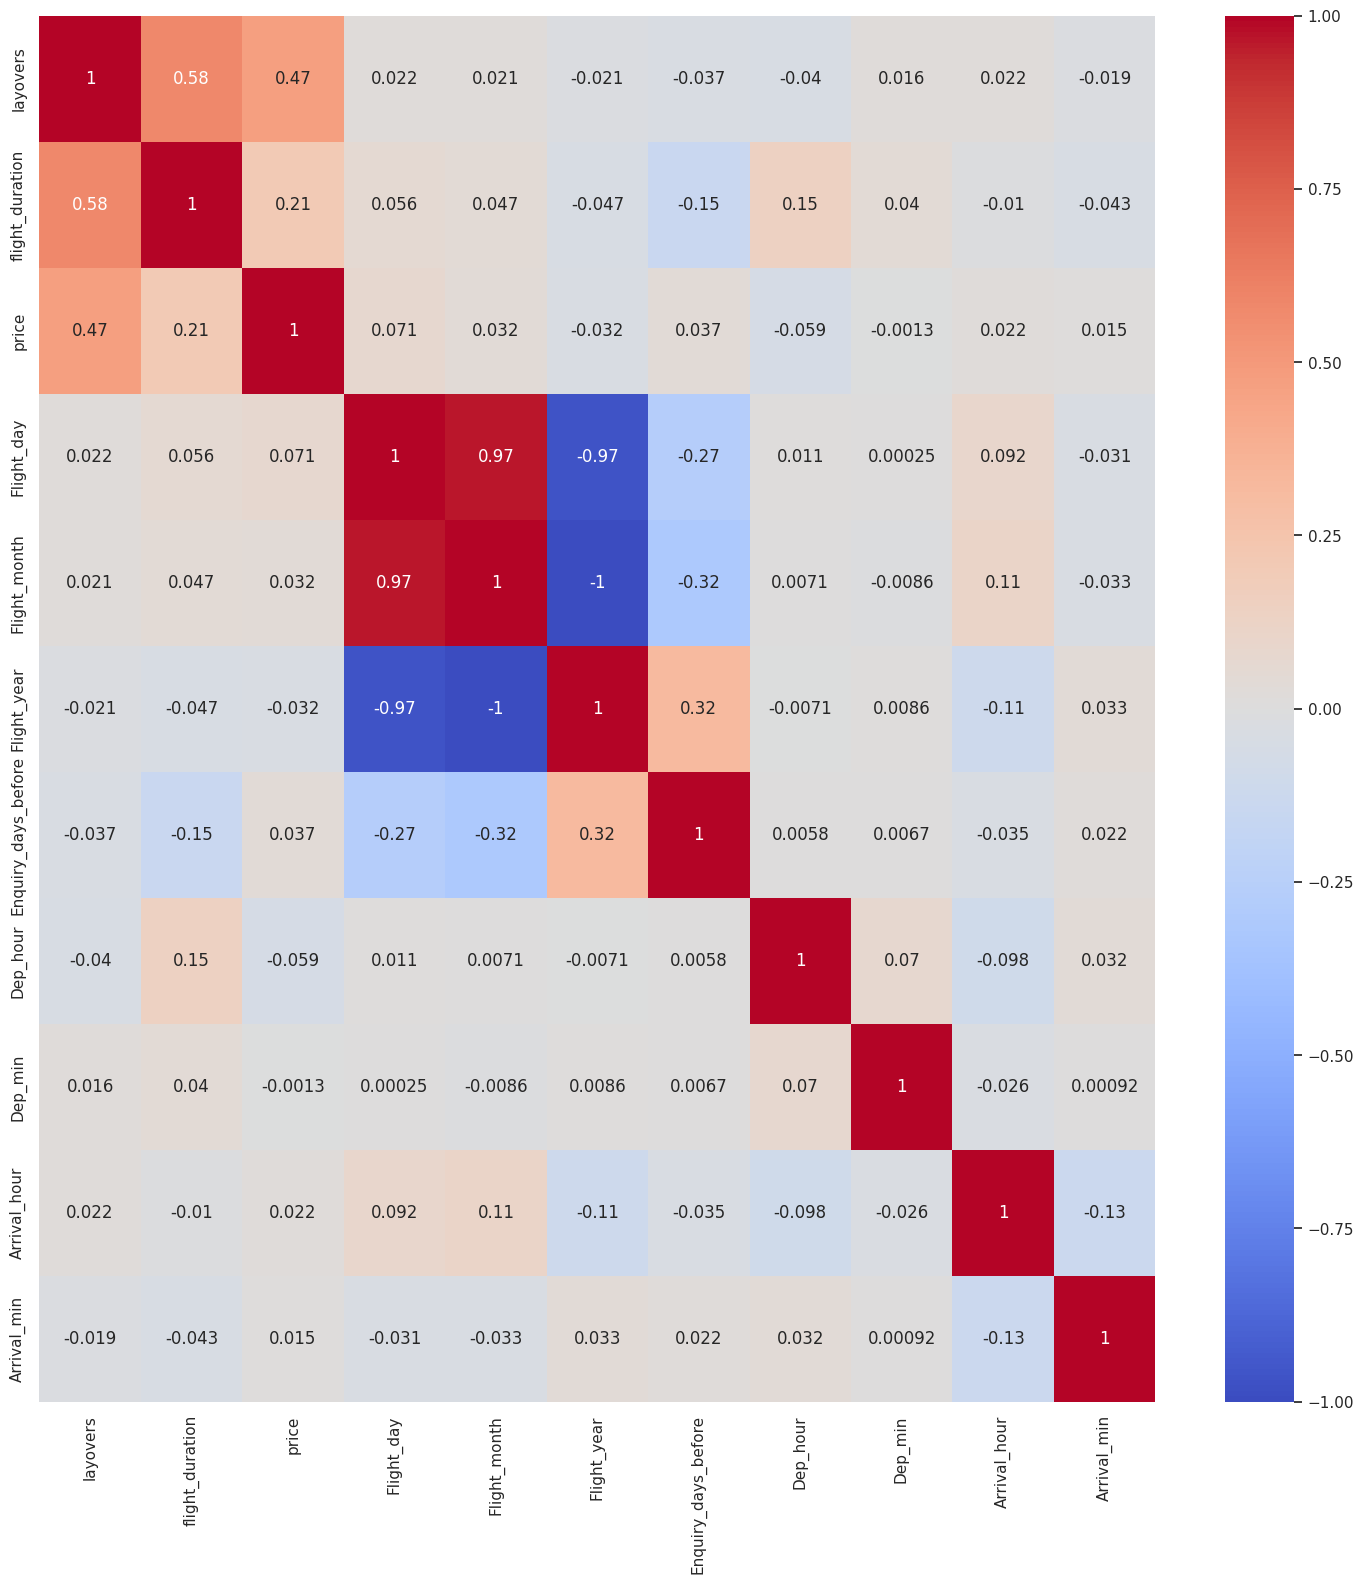

In [ ]:
plt.figure(figsize = (18,18))

sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="coolwarm")

plt.show()

In [ ]:
# Important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection =ExtraTreesRegressor()
selection.fit(X,y.values.ravel())

ExtraTreesRegressor()

In [ ]:

print(selection.feature_importances_)

[1.56223748e-01 7.67257609e-02 9.64536239e-02 5.75352150e-03
 5.80241454e-03 6.91190892e-02 3.22141362e-02 2.96525741e-02
 2.69882198e-02 2.80549042e-02 9.88386267e-02 3.75854221e-04
 5.76115859e-05 3.29442759e-05 5.77882434e-05 2.57604669e-06
 7.68348531e-05 6.07182976e-04 4.68288316e-04 2.27617777e-04
 2.60664972e-06 8.54212422e-05 9.81433387e-06 1.94323289e-06
 2.00201206e-05 8.10211215e-03 1.24096775e-07 7.97969769e-05
 1.50979008e-03 3.17979268e-05 5.26237507e-05 2.80381855e-04
 5.71029270e-04 1.81176959e-03 5.91745684e-06 1.74253611e-07
 2.55505662e-03 2.09052985e-03 7.52543138e-05 6.56484554e-04
 5.23361422e-07 1.06662575e-03 4.16509252e-04 3.17178720e-04
 4.32909926e-03 5.19801252e-05 6.53454524e-04 2.33781674e-06
 2.10565280e-03 1.28634296e-04 7.68180138e-05 2.09385757e-03
 2.91585298e-04 9.84527100e-06 5.00501704e-03 7.34253349e-03
 1.39824003e-06 5.78588982e-07 2.58607483e-05 3.65830861e-04
 4.42770595e-06 8.51608820e-03 8.24095469e-03 3.39739700e-03
 4.28474676e-03 1.574369

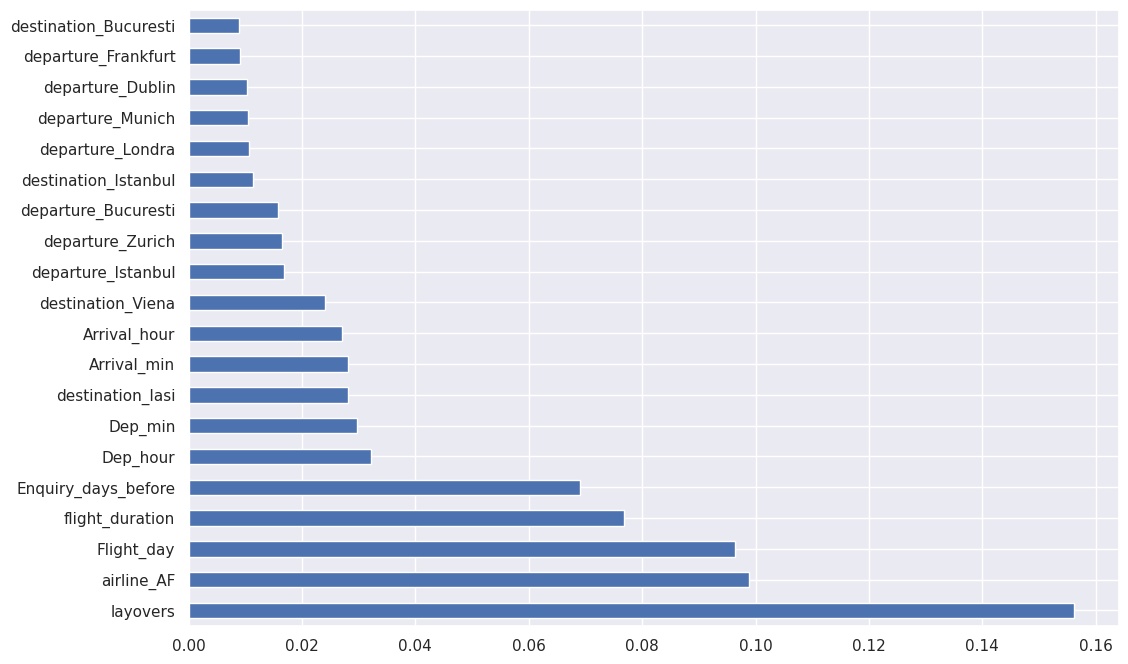

In [ ]:
# plot graph of important features

plt.figure(figsize =(12,8))
feat_importances =pd.Series(selection.feature_importances_,index =X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

## Fitting model using Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X,y.values.ravel(),test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred =reg_rf.predict(X_test)


In [ ]:
reg_rf.score(X_train,y_train)

0.9745382492027748

In [ ]:
reg_rf.score(X_test,y_test)

0.8456152353080002

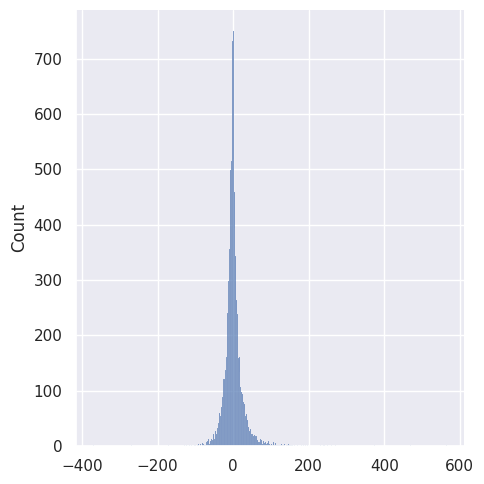

In [ ]:
sns.displot(y_test-y_pred)
plt.show()

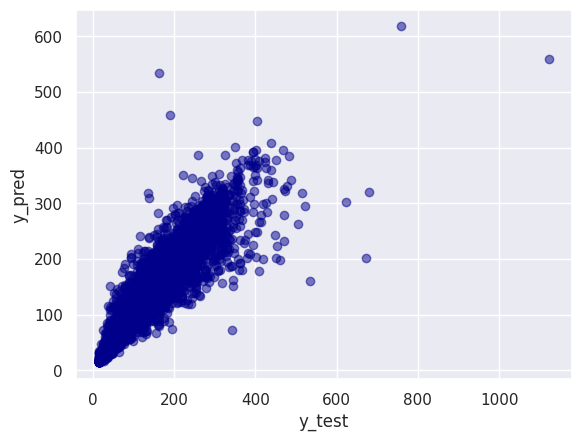

In [ ]:
plt.scatter(y_test,y_pred,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics


In [ ]:
print("MAE:" , metrics.mean_absolute_error(y_test,y_pred))
print("MSE:" , metrics.mean_squared_error(y_test,y_pred))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 15.83462384826219
MSE: 756.5839056783906
RMSE: 27.50607034235153


In [ ]:
metrics.r2_score(y_test, y_pred)

0.8456152353080002

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2', 0.5, 0.75, 10]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=0.75, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  58.8s
[CV] END max_depth=5, max_features=0.75, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  58.8s
[CV] END max_depth=5, max_features=0.75, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  60.0s
[CV] END max_depth=5, max_features=0.75, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.0min
[CV] END max_depth=5, max_features=0.75, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  59.8s
[CV] END max_depth=25, max_features=0.5, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=  39.3s
[CV] END max_depth=25, max_features=0.5, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=  38.0s
[CV] END max_depth=25, max_features=0.5, min_samples_leaf=2, min_samples_split=100, n_estimators=300; 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2', 0.5,
                                                         0.75, 10],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 0.75,
 'max_depth': 25}

In [ ]:
prediction = rf_random.predict(X_test)

<Figure size 800x800 with 0 Axes>

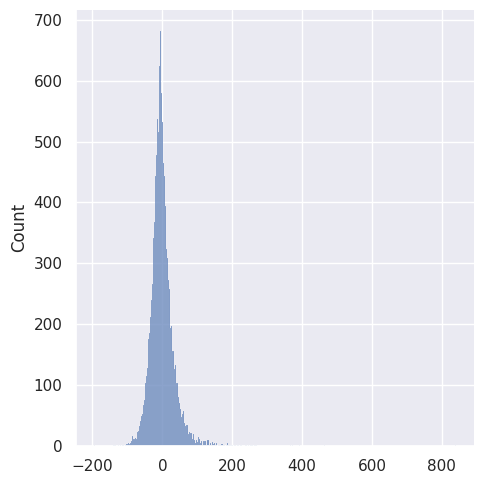

In [ ]:
plt.figure(figsize =(8,8))
sns.displot(y_test-prediction)
plt.show()

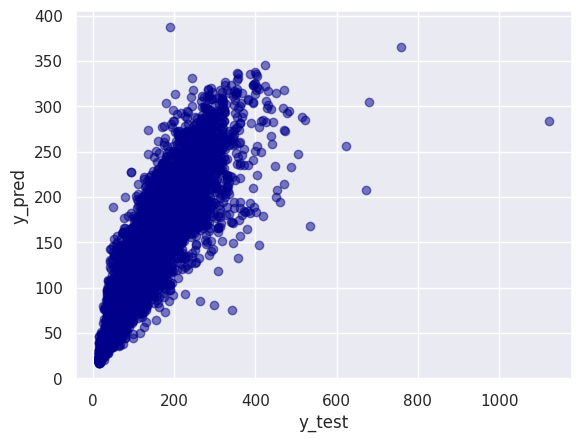

In [ ]:
plt.scatter(y_test,prediction,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print("MAE:" , metrics.mean_absolute_error(y_test,prediction))
print("MSE:" , metrics.mean_squared_error(y_test,prediction))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 23.48534844118788
MSE: 1255.7841190232052
RMSE: 35.43704444537108


# Save the model to reuse it again

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('./output/model_2.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)


In [ ]:
model = open('./output/model_2.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test_2)

In [ ]:
metrics.r2_score(y_test_2, y_prediction)

0.6417644739629969

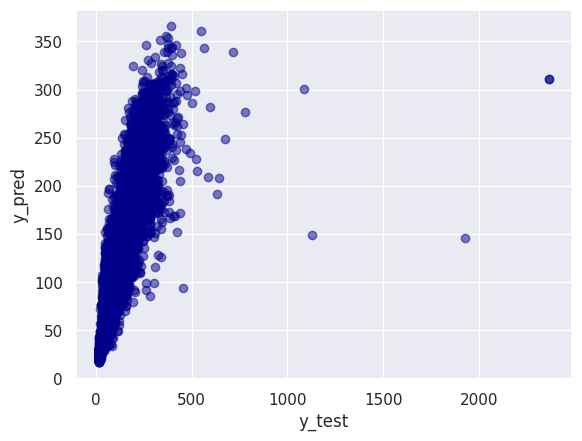

In [ ]:
plt.scatter(y_test_2, y_prediction, alpha =0.5, color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()